#YOLO

### This tutorial shall guide you to detect objects automatically by fine tuning a Yolo Algorithm. **YOLO** is a real-time object detection algorithm that uses a convolutional neural network (CNN) to predict the class probabilities and bounding boxes of objects in an image

### We shall be getting the data from Roboflow and deploying the model back on the same


#Before getting started

First Make an Account on Robolow: https://roboflow.com/

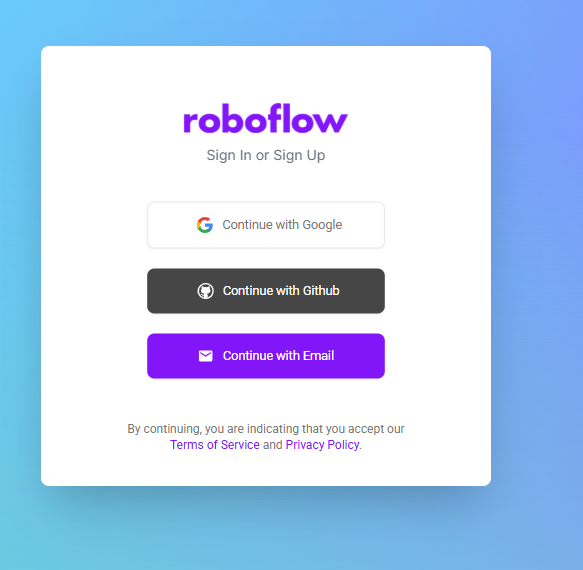

#Ensure your runtime is set to GPU
1. Go to runtime on your Colab
2. Click on Change runtimetype
3. Select T4 GPU



###Print Working Directory on Colab.

This is a Temporary Directory wherein all your work and data will be temporarity stored which will then disappear upon closing your workbook.

This will ensure your drive is not cluttered unnecessarily

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


#Find an appropriate dataset in Roboflow
Explore the Roboflow Universe
The world's largest collection of open source computer vision datasets and APIs.
Here we shall be working with with Animal Plant Detection Dataset. But you can choose a dataset of your liking

## you can fork this dataset to your roboflow repository
1. Click on Download Project
2. Then click on Fork Project
3. This will copy the project to your repository
4. You will be redirected to the project on your profile


Fork the dataset augment it and enhance the images this dataset is uploaded by; https://universe.roboflow.com/tacenda/animal-plant-detection
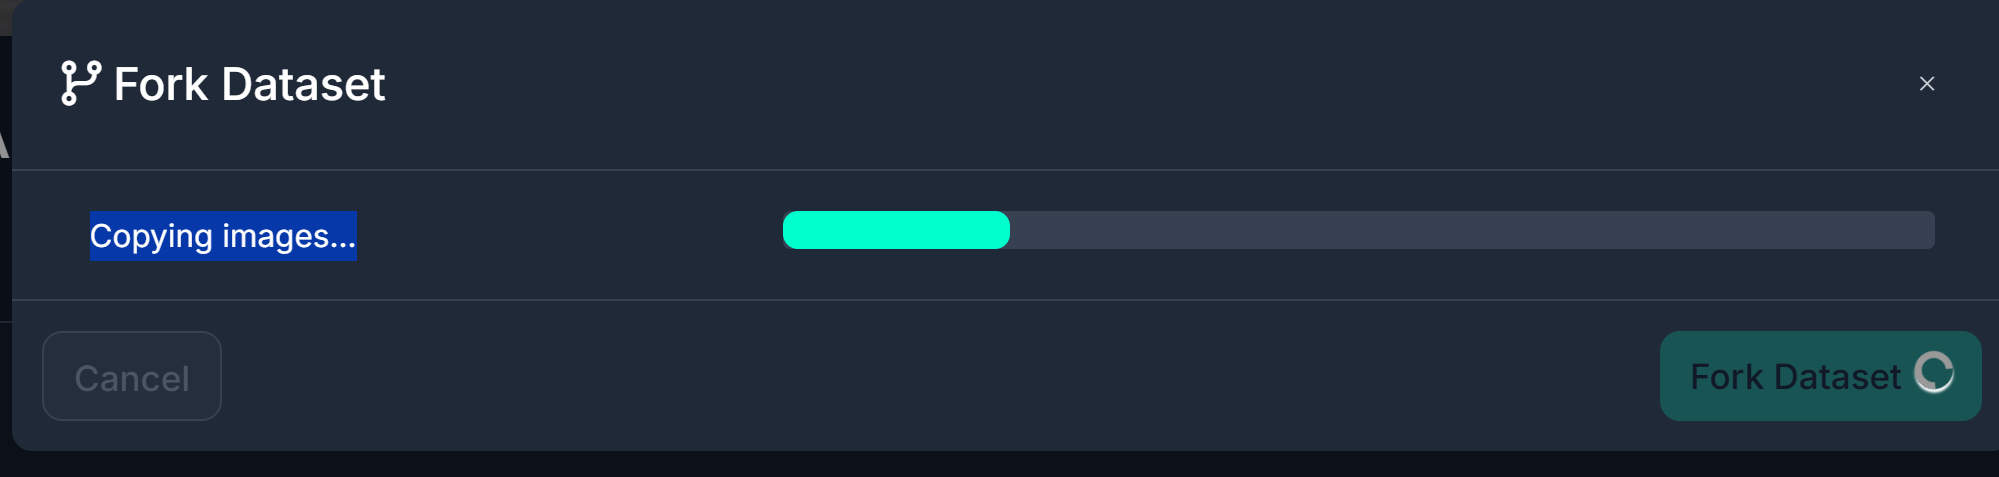![image.png]()

#Preprocess the image

Now you will have the opportunity to customize your images
1. You can change the number of images you want to use for train/test. Train Test split is crucial in training any algorithm [Here's why](https://www.shiksha.com/online-courses/articles/train-test-split/#:~:text=Train%20test%20split%20technique%20is,and%20its%20implementation%20in%20python.)
2. You can proprocess your images to ensure optimal training  ([Learn More Here](https://docs.roboflow.com/datasets/image-preprocessing))
3. You can augment your images if you believe you need more data to train your model [Learn More Here](https://blog.roboflow.com/data-augmentation/)

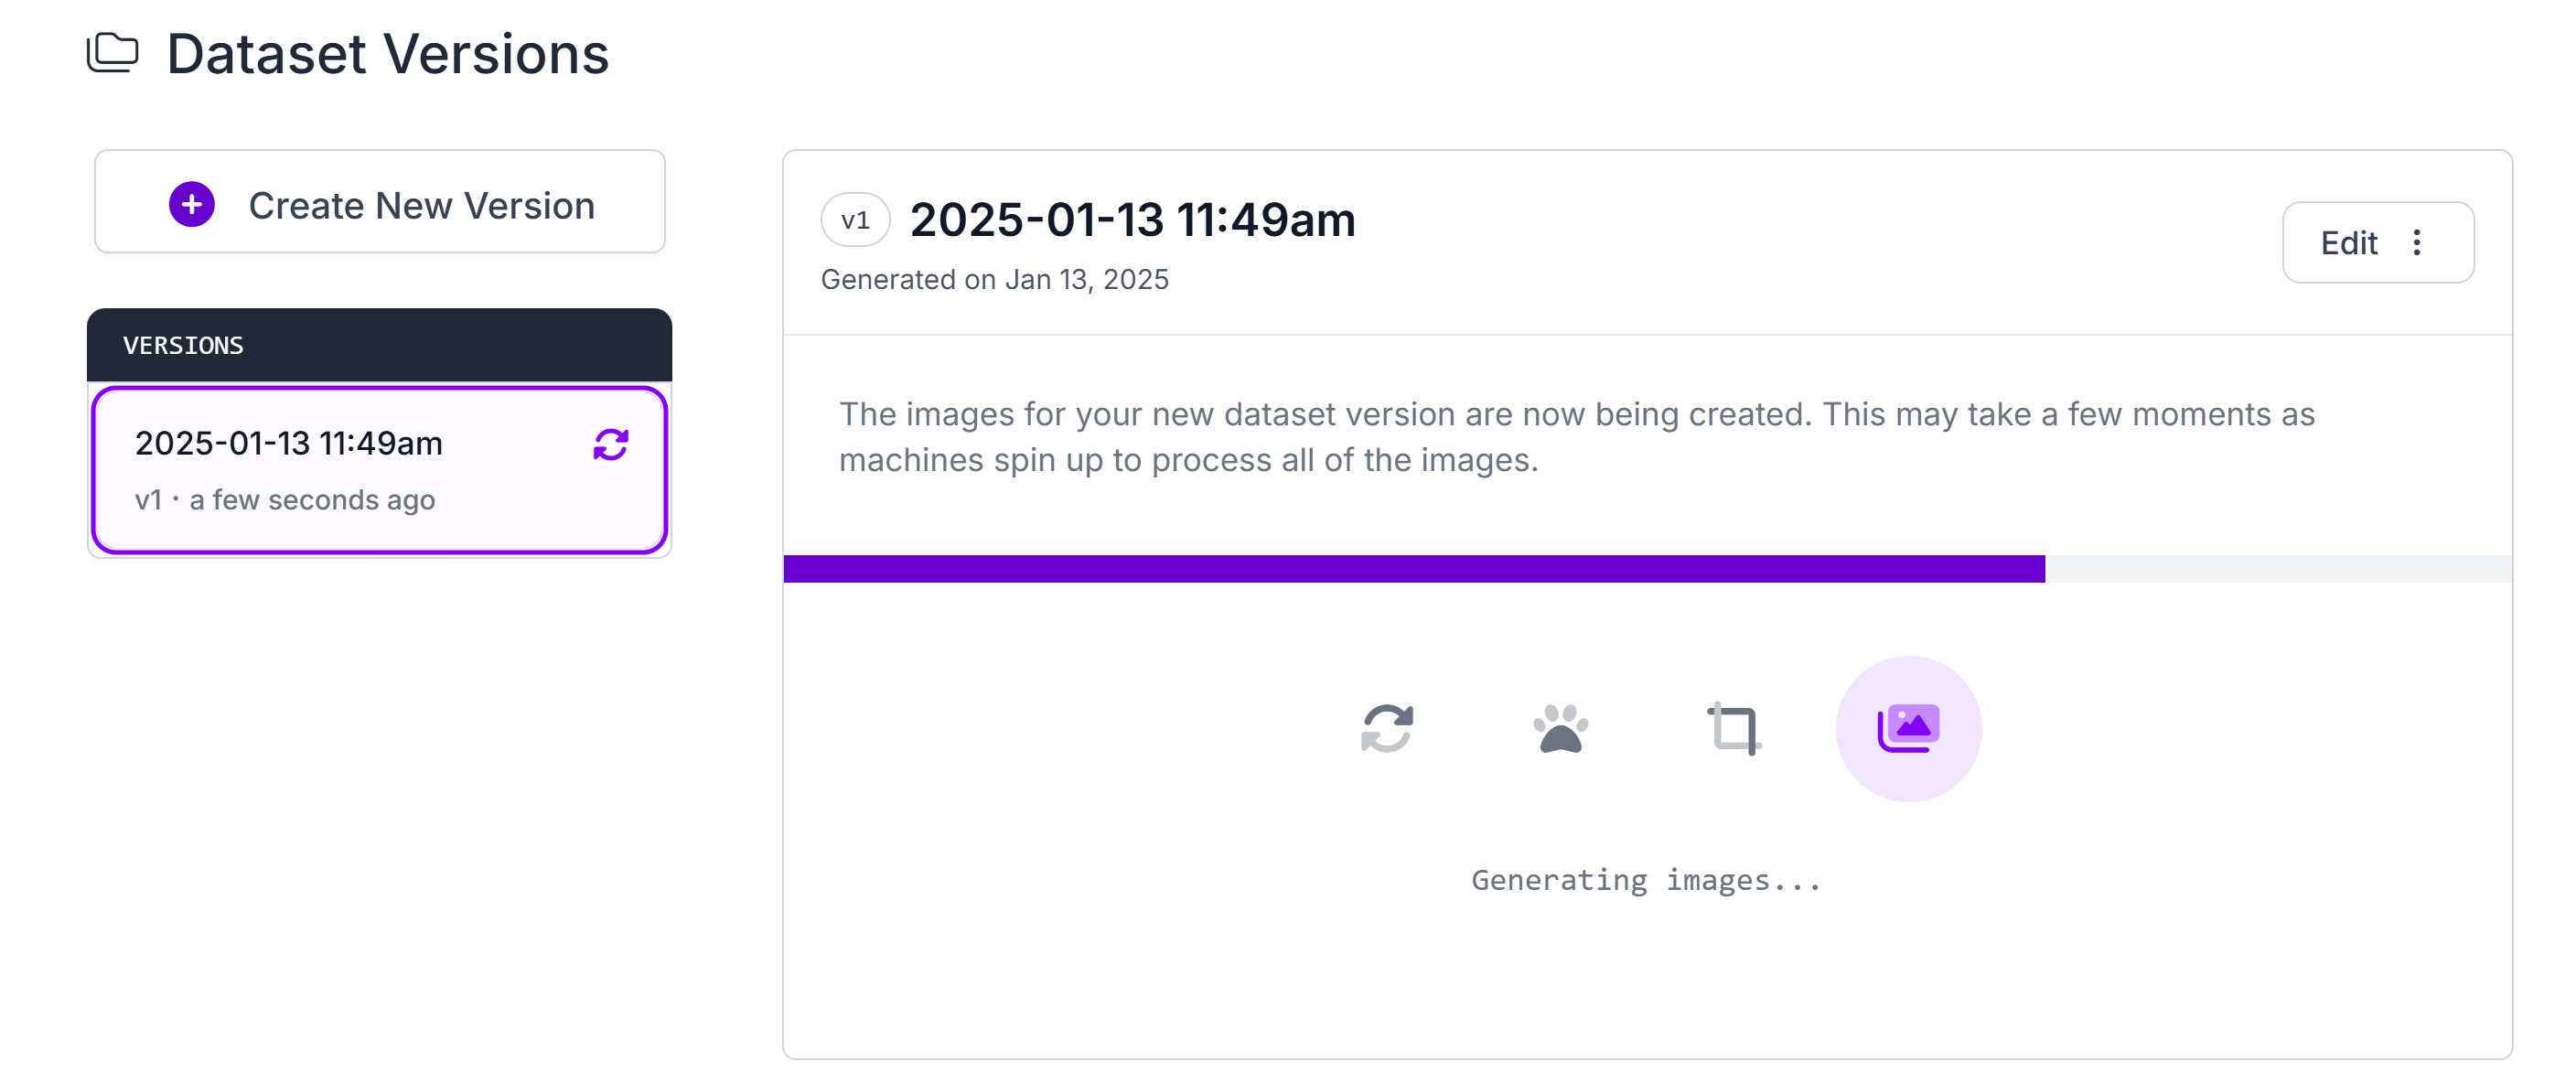

once you are done, it will create a new datase as per your requirements
You can also create different versions of the same dataset. eg. one without augmentations and the other with them.
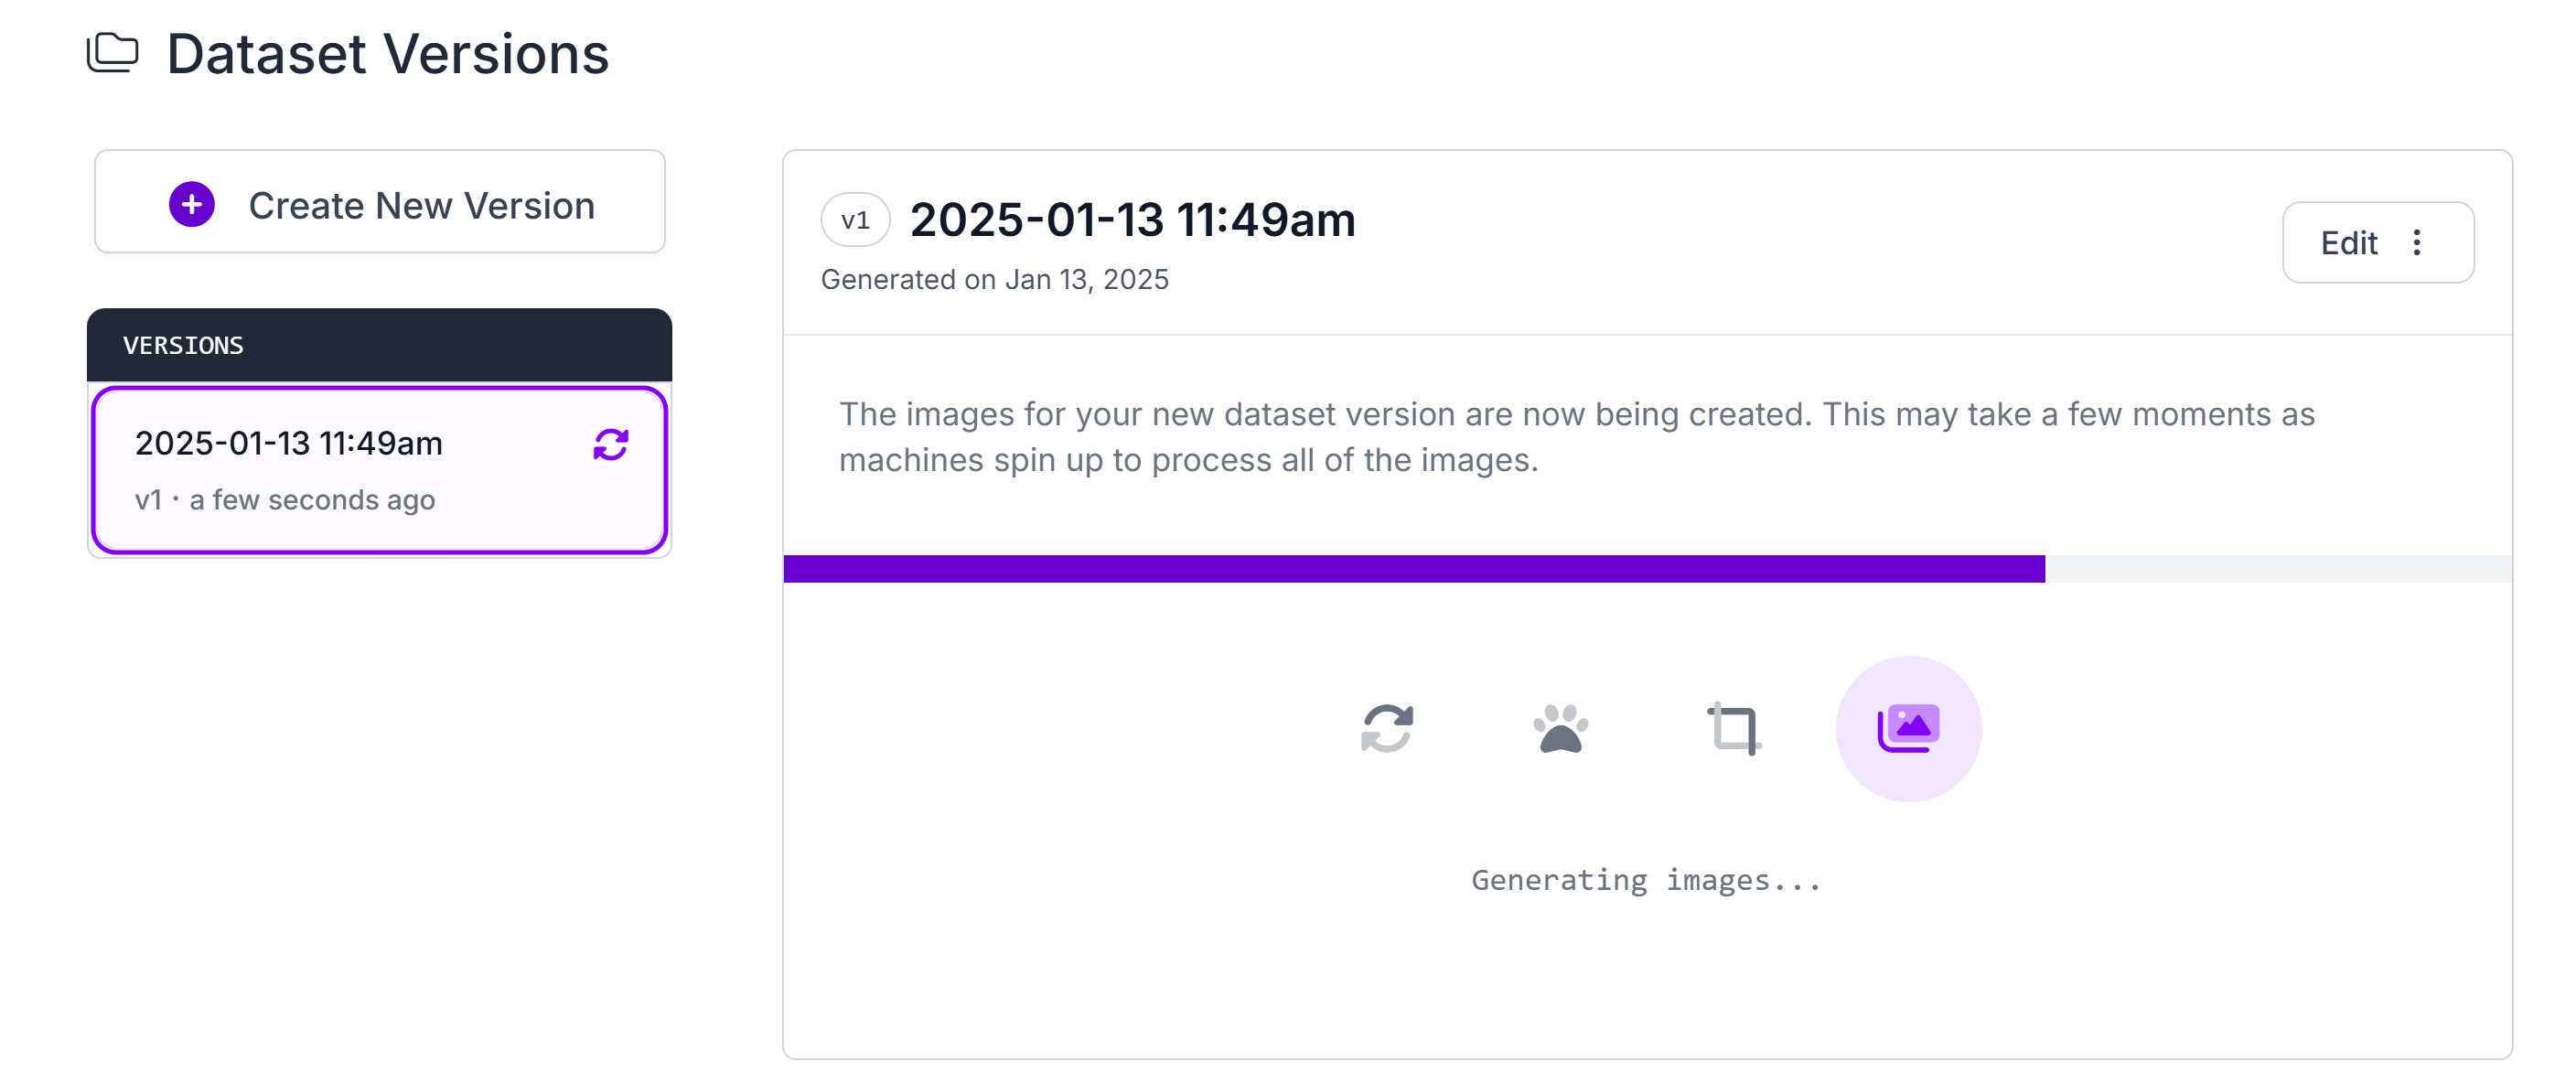

Finally click on create to create your oun dataset




In [ ]:
#We shall train the model using Yolo which has to be installed in the following way
%pip install "ultralytics<=8.3.40" supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.5/112.6 GB disk)


In [ ]:
#Now import the libraries

from ultralytics import YOLO
from PIL import Image
import requests


Now import your dataset to colab
you need to specify your userid and project id in the code below so that it can access your dataset

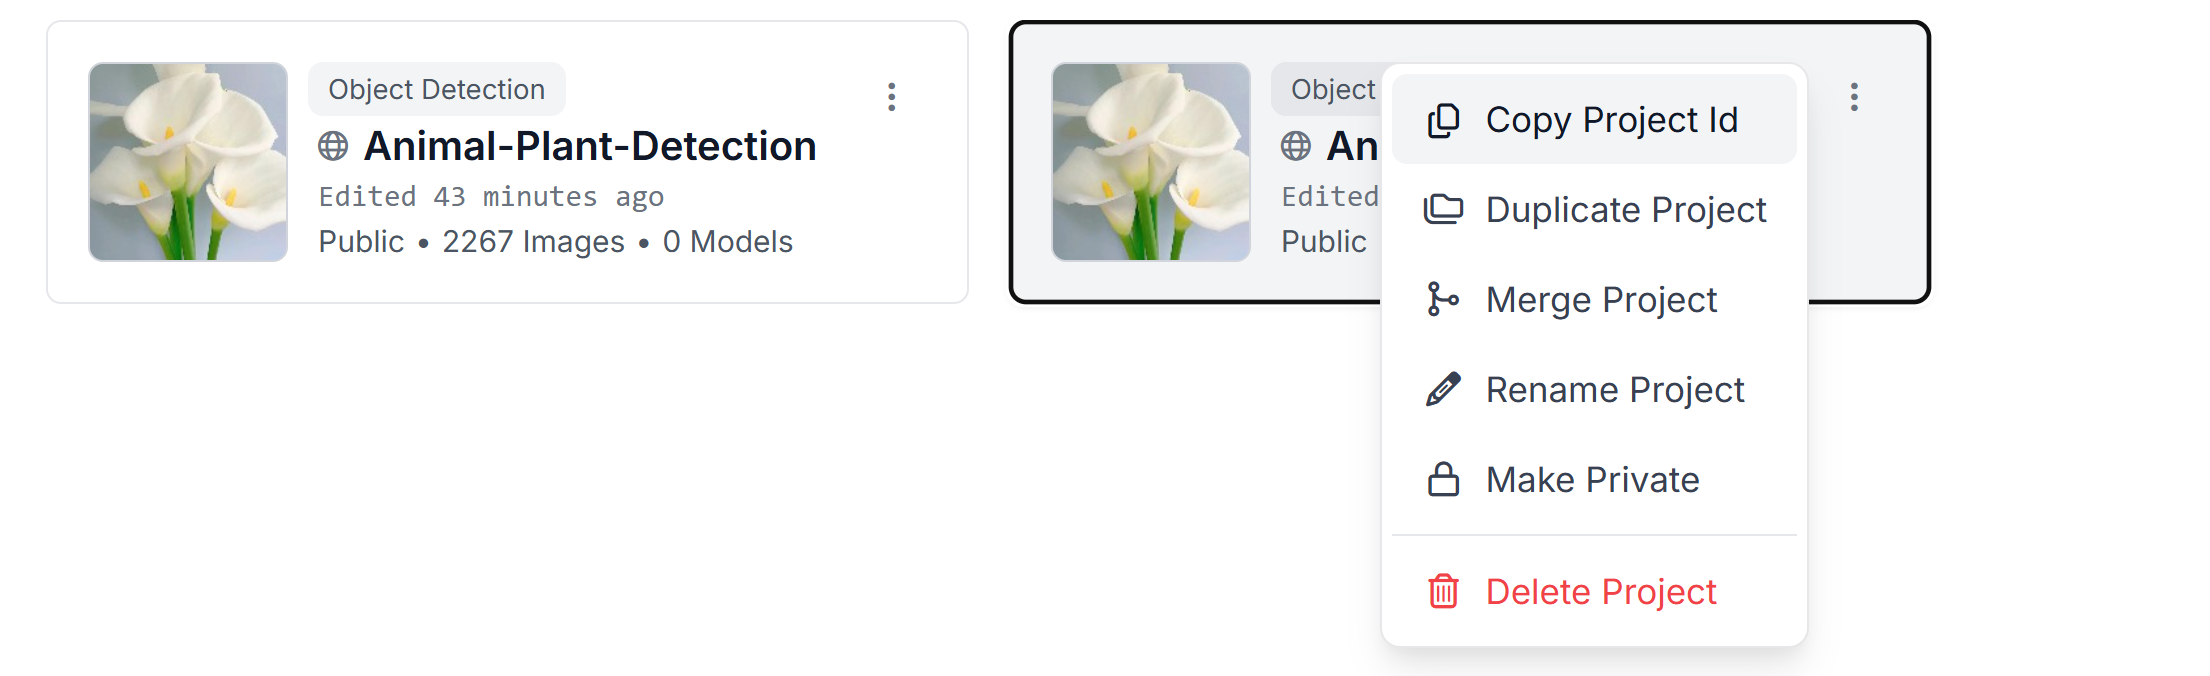


project = rf.workspace("your user id").project("your project id")
your user id would be in your url
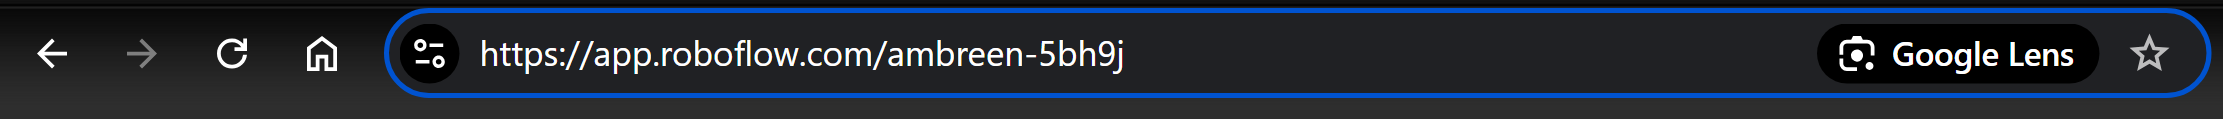




Configure API keys
To fine-tune YOLO11, you need to provide your Roboflow API key. Follow these steps:

Go to your Roboflow Settings page. Click Copy. This will place your private key in the clipboard.
In Colab, go to the left pane and click on Secrets (🔑). Store Roboflow API Key under the name ROBOFLOW_API_KEY. Ensure the variables match



In [ ]:
# Make a new directory  on google drive to store and work with your data
!mkdir {HOME}/datasets
#go to that directory
%cd {HOME}/datasets


### Now do rest of the work in this directory.
from google.colab import userdata
from roboflow import Roboflow

ROBOFLOW_API_KEY = userdata.get('ROBOFLOW_API_KEY')
rf = Roboflow(api_key=ROBOFLOW_API_KEY)


# Access the workspace and project
#workspace = rf.workspace("ambreen")
project = rf.workspace("ambreen-5bh9j").project("animal-plant-detection-mgcyp")
version = project.version(1)
dataset = version.download("yolov11")

# Verify the download location and contents
import os
print ("")
print("Dataset downloaded to:", dataset.location)
print("Contents:", os.listdir(dataset.location))


mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Animal-Plant-Detection-1 in yolov11:: 100%|██████████| 4543/4543 [00:01<00:00, 3705.01it/s]


Dataset downloaded to: /content/Animal-Plant-Detection-1
Contents: ['README.dataset.txt', 'data.yaml', 'README.roboflow.txt', 'train', 'valid']


In [ ]:
#Alternate way
# This has been commented out
"""import requests

# Define the dataset URL
dataset_url = "https://app.roboflow.com/ds/OWwLyii6fx?key=Td0d99XEbm"

# Send a GET request to the dataset URL
#response = requests.get(dataset_url)

# Check if the request was successful
if response.status_code == 200:
    # Define the path to save the dataset
    dataset_path = "/content/datasets/Animal-Plant-Detection-1/roboflow.zip"

    # Write the content to a ZIP file
    with open(dataset_path, 'wb') as f:
        f.write(response.content)

    print(f"Dataset downloaded successfully to {dataset_path}")
else:
    print(f"Failed to download dataset. Status code: {response.status_code}")
"""

'import requests\n\n# Define the dataset URL\ndataset_url = "https://app.roboflow.com/ds/OWwLyii6fx?key=Td0d99XEbm"\n\n# Send a GET request to the dataset URL\n#response = requests.get(dataset_url)\n\n# Check if the request was successful\nif response.status_code == 200:\n    # Define the path to save the dataset\n    dataset_path = "/content/datasets/Animal-Plant-Detection-1/roboflow.zip"\n\n    # Write the content to a ZIP file\n    with open(dataset_path, \'wb\') as f:\n        f.write(response.content)\n\n    print(f"Dataset downloaded successfully to {dataset_path}")\nelse:\n    print(f"Failed to download dataset. Status code: {response.status_code}")\n'

In [ ]:
#list the contents of the directory
!ls /content/datasets/

ls: cannot access '/content/datasets/': No such file or directory


In [ ]:
!ls /content/Animal-Plant-Detection-1

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
!ls /content/Animal-Plant-Detection-1/

data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
!ls /content/Animal-Plant-Detection-1/train

images	labels


In [ ]:
#!ls /content/datasets/Animal-Plant-Detection-1/train/images

In [ ]:
#yolo requires data.yaml
#Let us read the file

with open('/content/Animal-Plant-Detection-1/data.yaml', 'r') as file:
    data_yaml = file.read()
    print(data_yaml)

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 44
names: ['anemones', 'blackcat', 'blueroses', 'bordercollie', 'buffalo', 'calicocat', 'callalily', 'carnations', 'cattle', 'chicken', 'cockscombs', 'dahlias', 'dairycow', 'dingo', 'duck', 'elephant', 'goat', 'goldenretriever', 'janecat', 'kangaroo', 'koala', 'komododragon', 'lily', 'lioncat', 'nepenthesmirabilis', 'orangecat', 'paeonialactiflora', 'panda', 'peregrinefalcon', 'pug', 'rabbit', 'redpanda', 'redroses', 'sheep', 'shihtzu', 'snowleopard', 'strawflower', 'sunflowers', 'tabbycat', 'tibetanmastiff', 'tugou', 'tulip', 'venusflytrap', 'whitecat']

roboflow:
  workspace: ambreen-5bh9j
  project: animal-plant-detection-mgcyp
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/ambreen-5bh9j/animal-plant-detection-mgcyp/dataset/1


We shall be working with YAML Files which are important in yolo to direct the alorithm to train, test, validate folders and also specify the labels.

In [ ]:
import yaml
# but in order to use this file we shall be setting the paths to absolute and not relative, this will ensure no errors.


# Define the path to your data.yaml file
yaml_file_path = '/content/Animal-Plant-Detection-1/data.yaml'

# Load the existing YAML file
with open(yaml_file_path, 'r') as file:
    data = yaml.safe_load(file)

# Update the paths
data['train'] = '/content/Animal-Plant-Detection-1/train/images'
data['val'] = '/content/Animal-Plant-Detection-1/valid/images'
data['test'] = '/content/Animal-Plant-Detection-1/test/images'

# Save the updated YAML back to the file
with open(yaml_file_path, 'w') as file:
    yaml.dump(data, file, default_flow_style=False, sort_keys=False)


In [ ]:
with open('/content/Animal-Plant-Detection-1/data.yaml', 'r') as file:
    data_yaml = file.read()
    print(data_yaml)

train: /content/Animal-Plant-Detection-1/train/images
val: /content/Animal-Plant-Detection-1/valid/images
test: /content/Animal-Plant-Detection-1/test/images
nc: 44
names:
- anemones
- blackcat
- blueroses
- bordercollie
- buffalo
- calicocat
- callalily
- carnations
- cattle
- chicken
- cockscombs
- dahlias
- dairycow
- dingo
- duck
- elephant
- goat
- goldenretriever
- janecat
- kangaroo
- koala
- komododragon
- lily
- lioncat
- nepenthesmirabilis
- orangecat
- paeonialactiflora
- panda
- peregrinefalcon
- pug
- rabbit
- redpanda
- redroses
- sheep
- shihtzu
- snowleopard
- strawflower
- sunflowers
- tabbycat
- tibetanmastiff
- tugou
- tulip
- venusflytrap
- whitecat
roboflow:
  workspace: ambreen-5bh9j
  project: animal-plant-detection-mgcyp
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/ambreen-5bh9j/animal-plant-detection-mgcyp/dataset/1



In [ ]:
!ls /content/Animal-Plant-Detection-1/train/images

anemones_0_jpg.rf.c1bfd3497df846bfded9cb8782b07f55.jpg
anemones_10_jpg.rf.146f2df82b180c4e5bbbd04a9d5525ef.jpg
anemones_11_jpg.rf.a92be3acaf81ac91b5175f67eb1600c6.jpg
anemones_14_jpg.rf.d53e3451c80849edb2e1f5cb72c34e06.jpg
anemones_15_jpg.rf.d80725c527a373e444da95a2ce057cb9.jpg
anemones_16_jpg.rf.f64fbb644890e549b2fbaea82cdb19da.jpg
anemones_19_jpg.rf.e2afce6fd96b5004a217184eb86f3023.jpg
anemones_21_jpg.rf.77377c83f91d528add603f6801da2a83.jpg
anemones_23_jpg.rf.7a70940237001d87195bc18730199c8f.jpg
anemones_24_jpg.rf.c296fbff7a4b365664e711456f791965.jpg
anemones_25_jpg.rf.57ce25c3e2e0b6eb2e4eeac6c2c64756.jpg
anemones_26_jpg.rf.4d7c1da9563d6ecdb0cc2d06dd184974.jpg
anemones_27_jpg.rf.62a6eb9a66af91c54f1fd9c5eb34e226.jpg
anemones_28_jpg.rf.679b3370e89aca07c52e860e0cd01c6f.jpg
anemones_29_jpg.rf.aa3537fa4f1f806fb9662e3568ee68aa.jpg
anemones_2_jpg.rf.2e83cb17a75d793b9d013636650ee738.jpg
anemones_30_jpg.rf.c5088c9206bbeaa7fdfa49bd6593b4b6.jpg
anemones_32_jpg.rf.f3d31fe187dc195575603c0f30f7b49

Total images: 2223


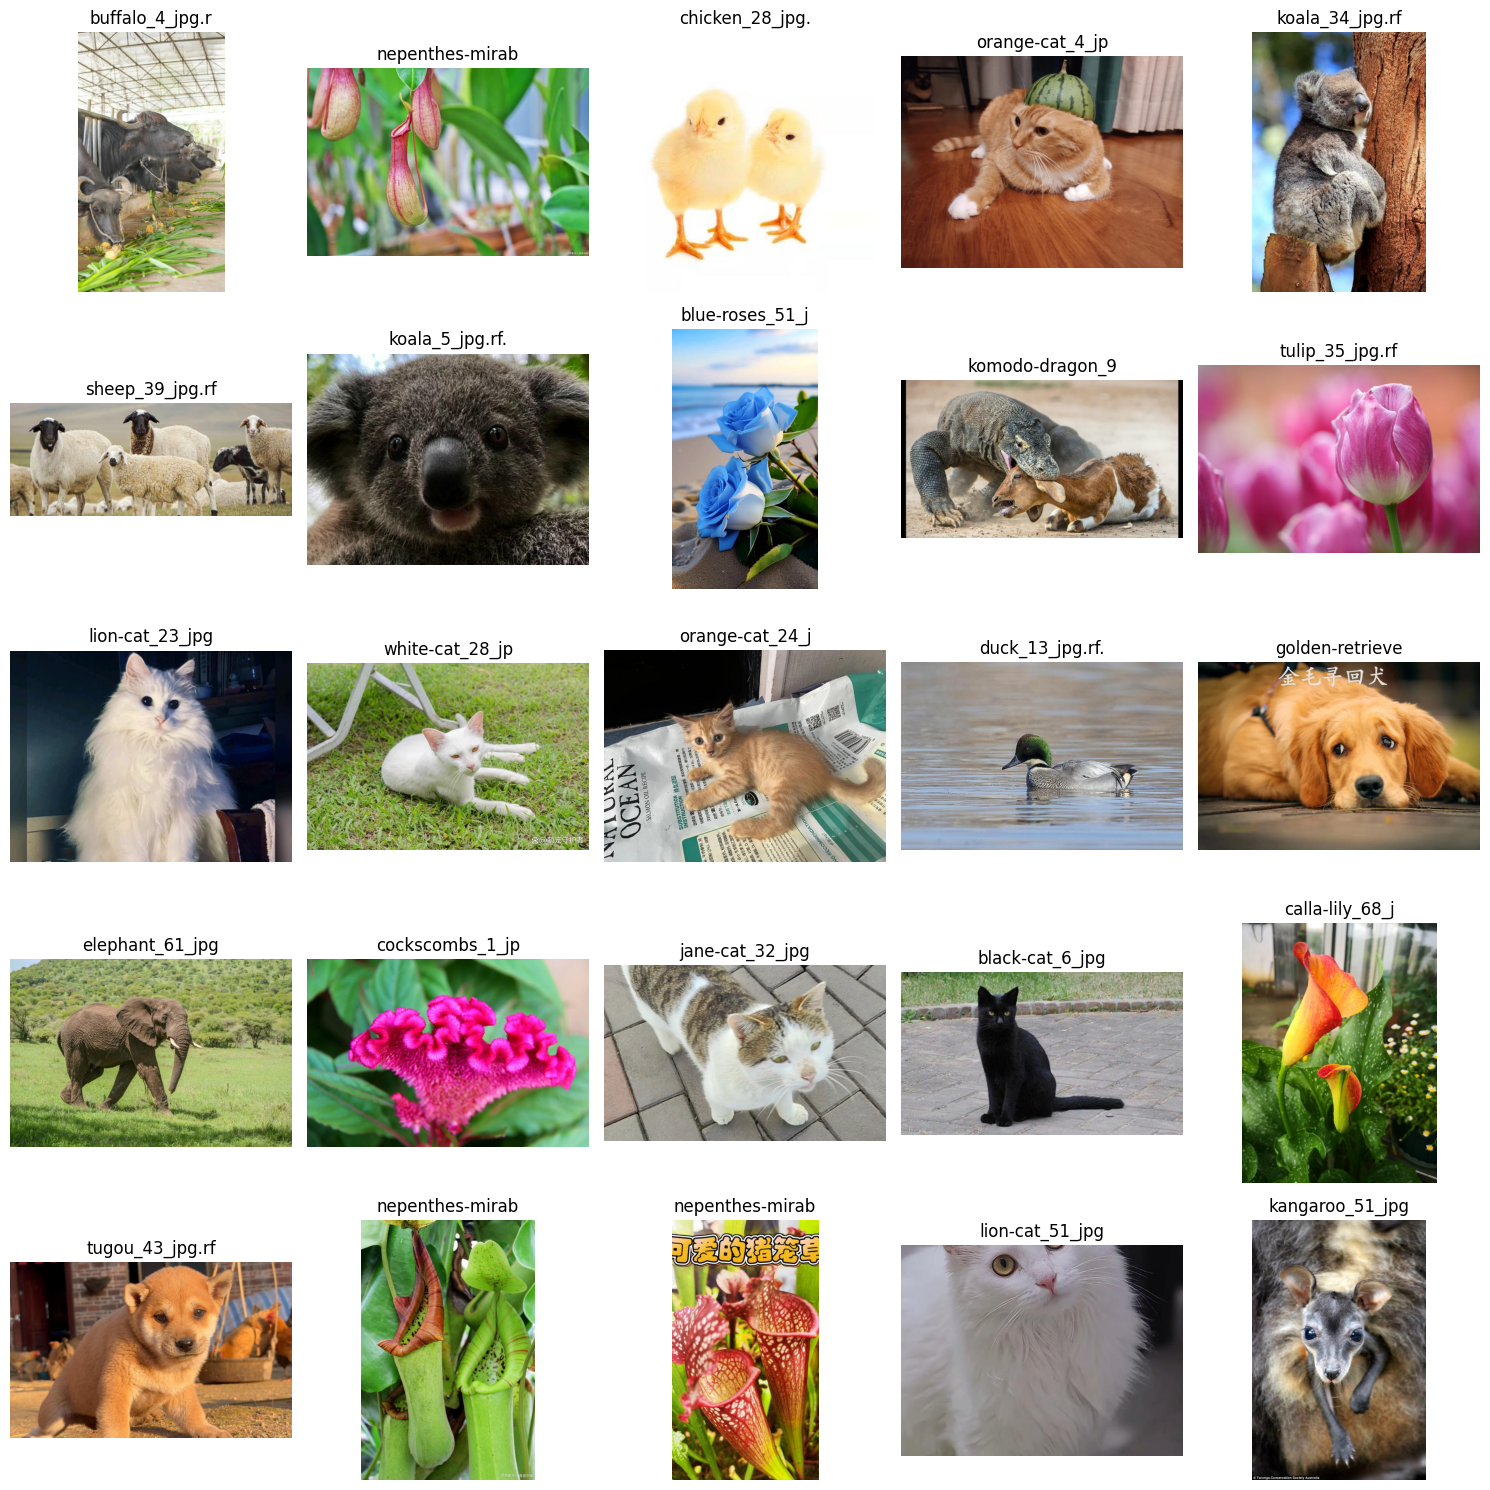

In [ ]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the path to your dataset
dataset_path = '/content/Animal-Plant-Detection-1/train/images'

# Get the list of image files directly from the dataset path
image_files = [f for f in os.listdir(dataset_path) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
print(f"Total images: {len(image_files)}")

# Check if there are any images
if not image_files:
    print("No images found in the dataset path.")
else:
    # Limit the number of images to display
    num_images_to_display = min(25, len(image_files))  # Display up to 25 images
    selected_images = random.sample(image_files, num_images_to_display)

    # Determine rows and columns for the subplot grid
    cols = 5  # Number of columns
    rows = (num_images_to_display // cols) + (1 if num_images_to_display % cols != 0 else 0)

    # Set up the plot
    plt.figure(figsize=(15, rows * 3))

    # Display the selected images
    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(dataset_path, image_file)

        # Read and display the image
        img = mpimg.imread(image_path)
        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(img)
        ax.set_title(image_file[:15])  # Show part of the filename as the title
        ax.axis('off')

    # Adjust layout and show the plot
    plt.tight_layout()
    plt.show()


In [ ]:
# Change the current working directory to the value stored in the HOME environment variable.
# This is often used in environments like Google Colab or Jupyter notebooks where HOME points to the base directory.
%cd {HOME}

# Import the PyTorch library to check GPU availability and enable CUDA acceleration if available.
import torch

# Check if a CUDA-enabled GPU is available for PyTorch to utilize. This is crucial for faster training or inference.
print(torch.cuda.is_available())  # Should return True if a GPU is accessible and PyTorch is configured correctly.


/content
True


In [ ]:
# Run the YOLOv8 command to start training a custom object detection model.
# YOLOv8 is a high-performance object detection framework.

!yolo task=detect mode=train model=yolo11s.pt data={dataset.location}/data.yaml epochs=10 imgsz=640 plots=True

# Explanation of each parameter:
# 1. task=detect: Specifies the task type. In this case, it's object detection.
# 2. mode=train: Indicates that the YOLO model will be trained on the provided dataset.
# 3. model=yolo11s.pt: The name of the YOLO model to use as a starting point for training.
#    - This could be a pre-trained checkpoint (e.g., yolo11s.pt is likely a small version of YOLO).
# 4. data={dataset.location}/data.yaml: Specifies the path to the dataset configuration file (`data.yaml`).
#    - The file typically contains information about the dataset structure, class names, and file paths.
# 5. epochs=10: Sets the number of training epochs (full passes through the dataset) to 10.
# 6. imgsz=640: Defines the input image size for the model during training (e.g., 640x640 pixels).
# 7. plots=True: Enables the generation of plots during training to visualize progress (e.g., loss curves, accuracy metrics).

# Note:
# - This command assumes the YOLO CLI tool is installed and properly configured.
# - The dataset should be correctly formatted, and the `data.yaml` file must exist and point to valid data paths.


100% 18.4M/18.4M [00:00<00:00, 313MB/s]
New https://pypi.org/project/ultralytics/8.3.64 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Animal-Plant-Detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None,

In [ ]:
# Check where the results are saved
!ls /content


Animal-Plant-Detection-1  runs	yolo11n.pt  yolo11s.pt


In [ ]:
!ls /content/Animal-Plant-Detection-1


data.yaml  README.dataset.txt  README.roboflow.txt  train  valid


In [ ]:
!ls /content/runs/detect

train


In [ ]:
!ls /content/runs/detect/train


args.yaml					    P_curve.png       train_batch2.jpg
confusion_matrix_normalized.png			    PR_curve.png      val_batch0_labels.jpg
confusion_matrix.png				    R_curve.png       val_batch0_pred.jpg
events.out.tfevents.1737346545.b96835890eb1.2735.0  results.csv       val_batch1_labels.jpg
F1_curve.png					    results.png       val_batch1_pred.jpg
labels_correlogram.jpg				    train_batch0.jpg  weights
labels.jpg					    train_batch1.jpg


In [ ]:
!ls /content/runs/detect/train/weights

best.pt  last.pt


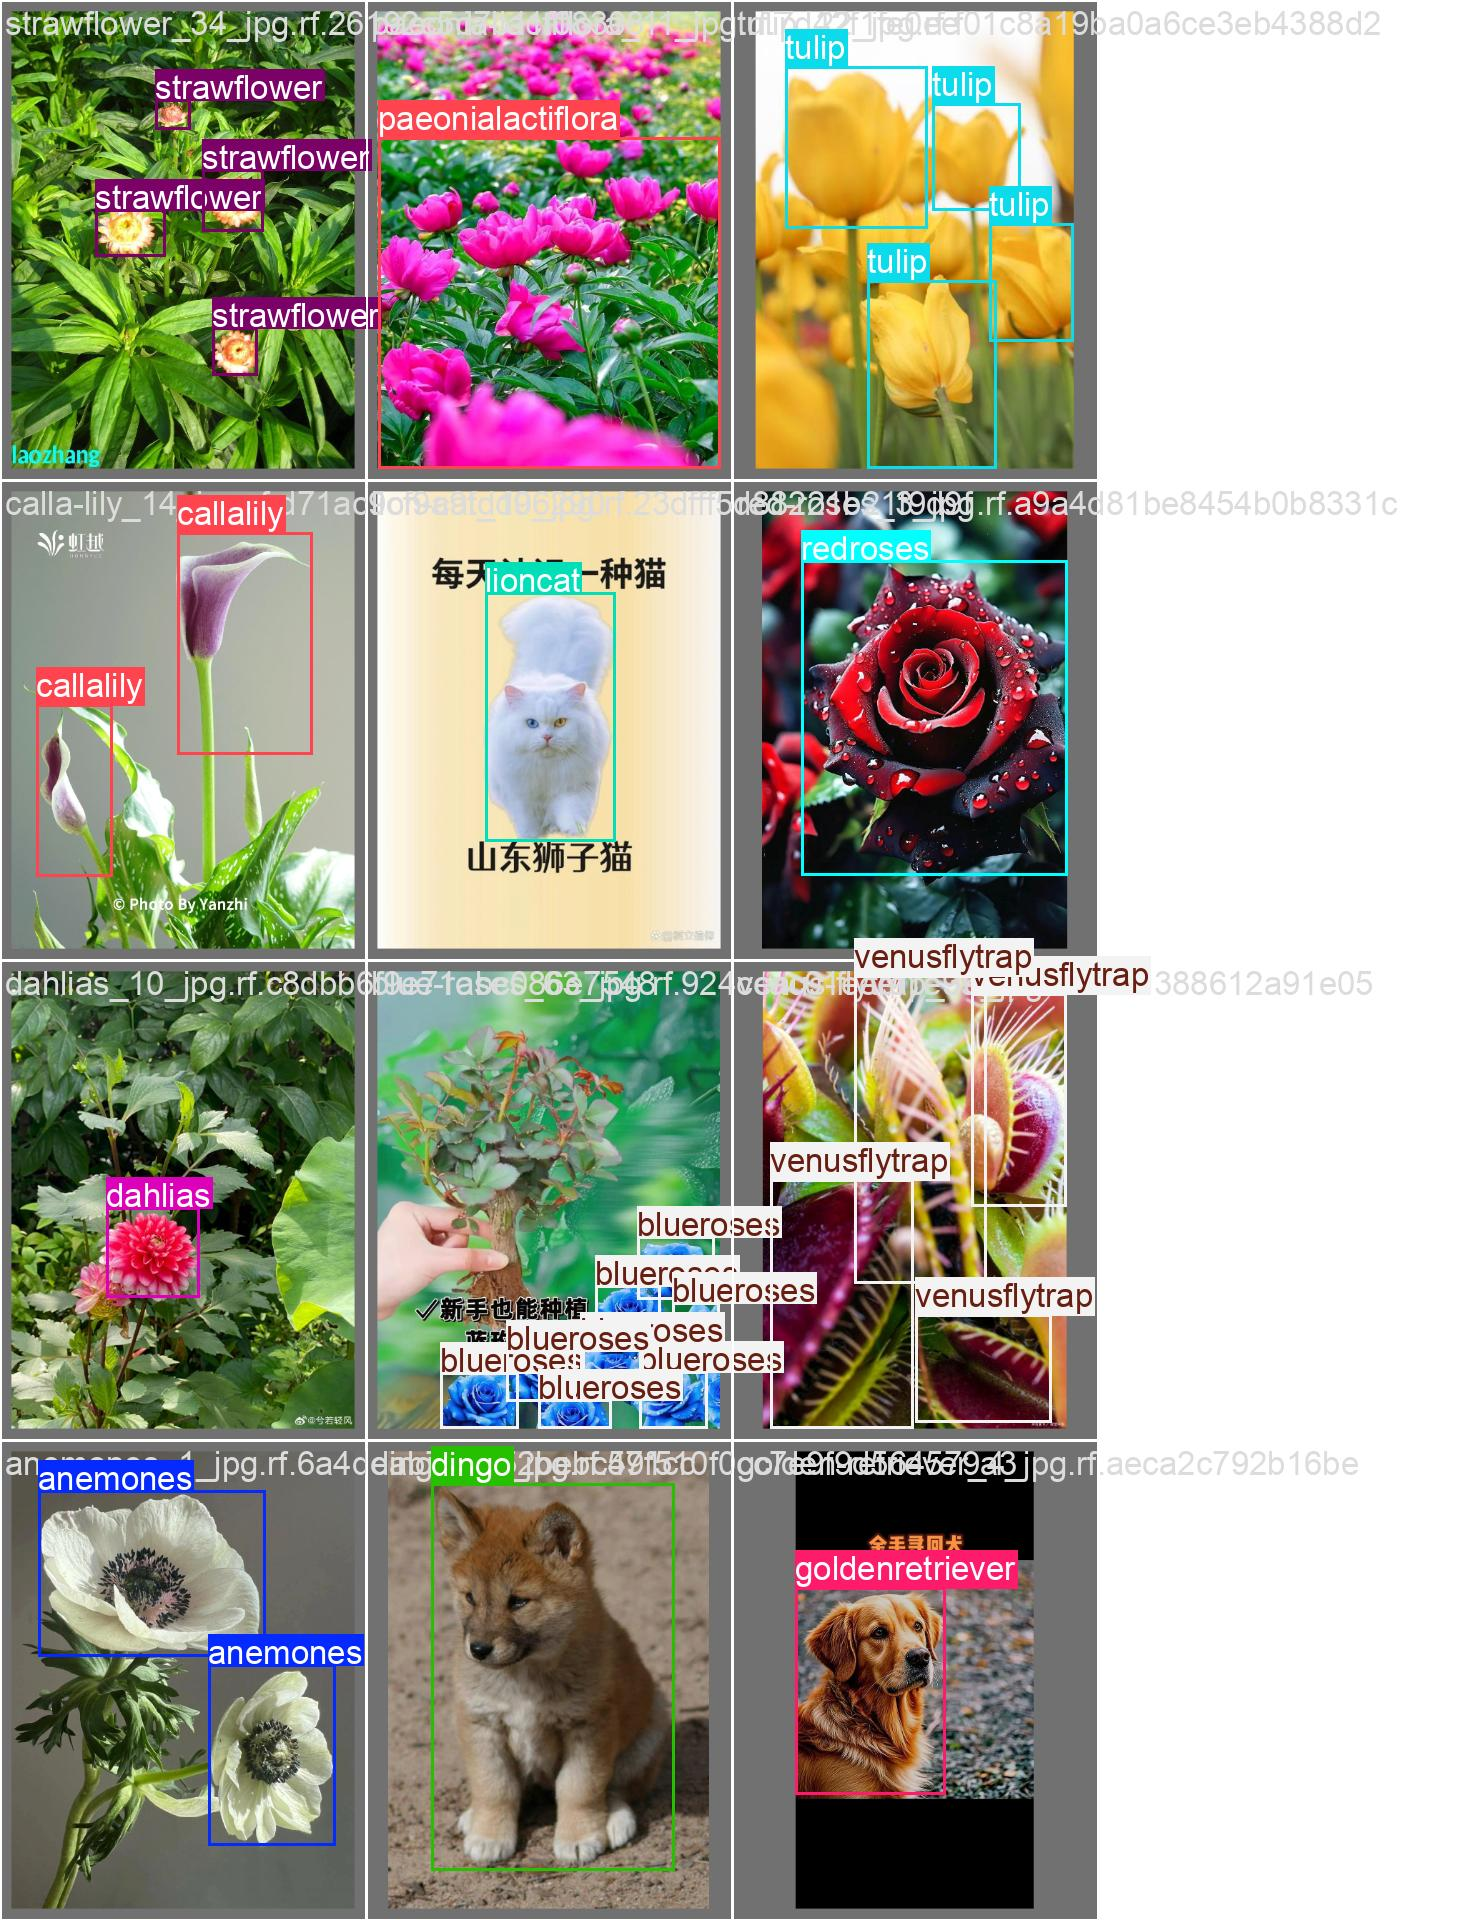

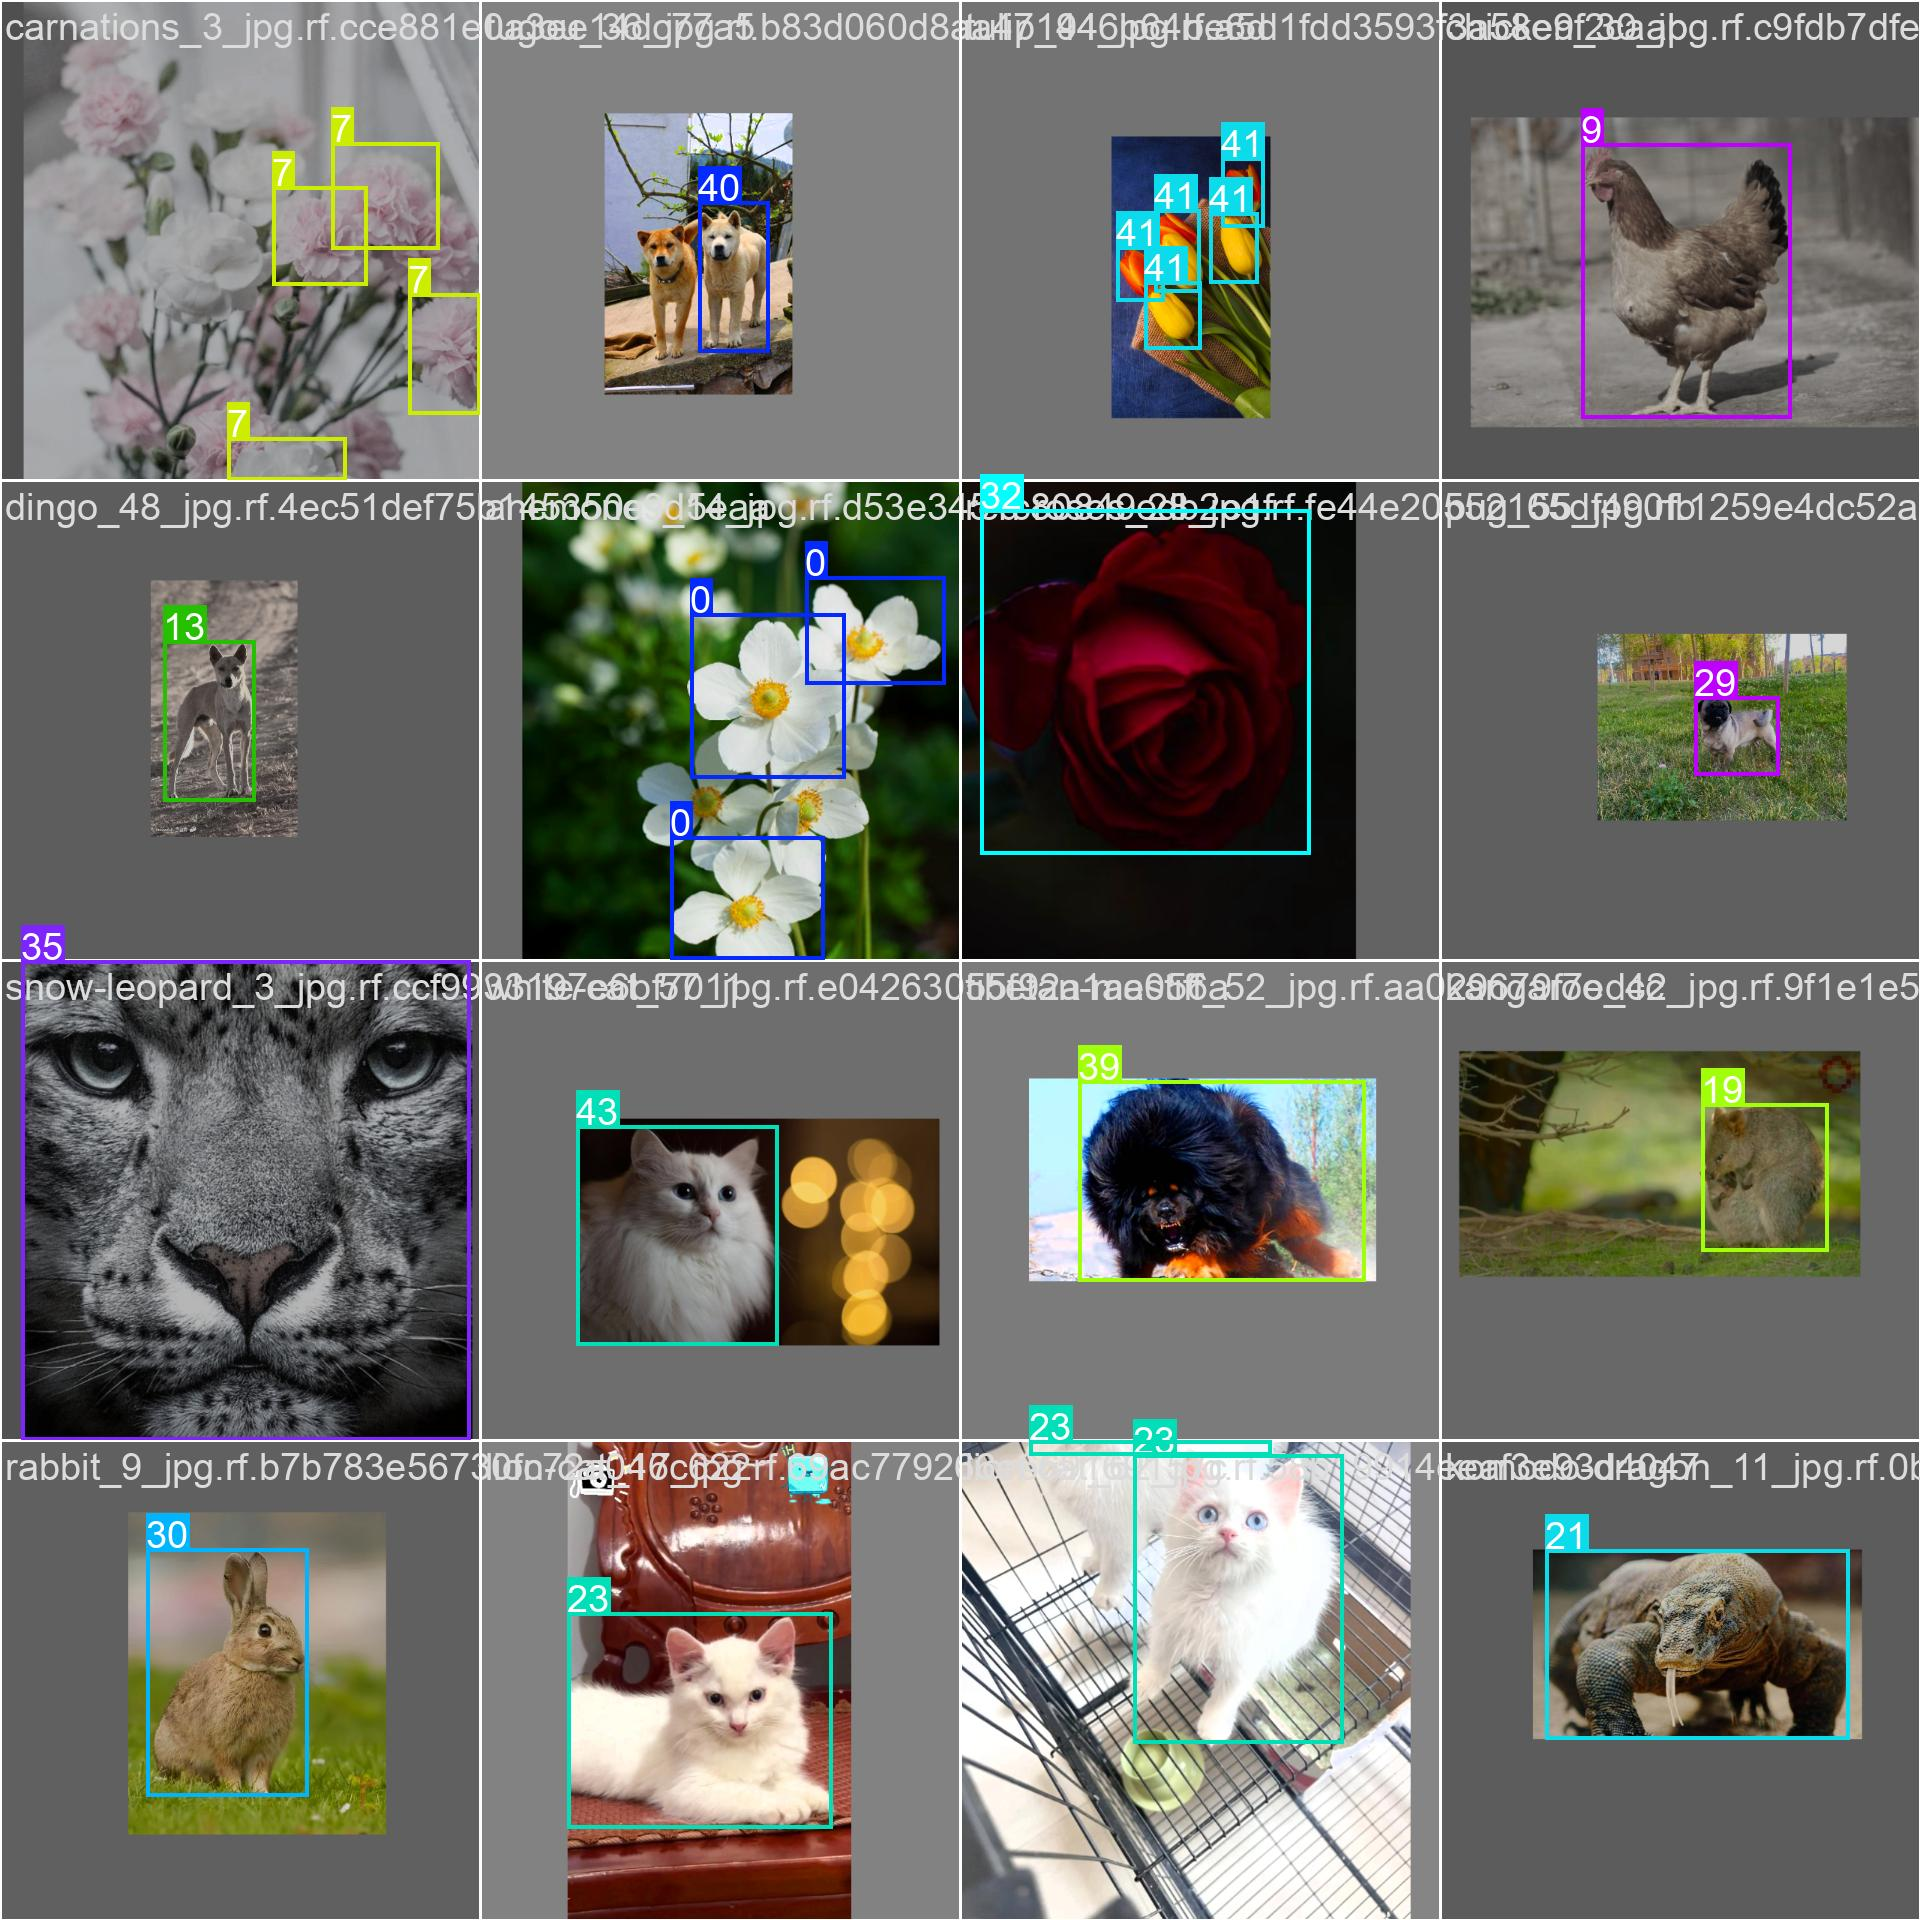

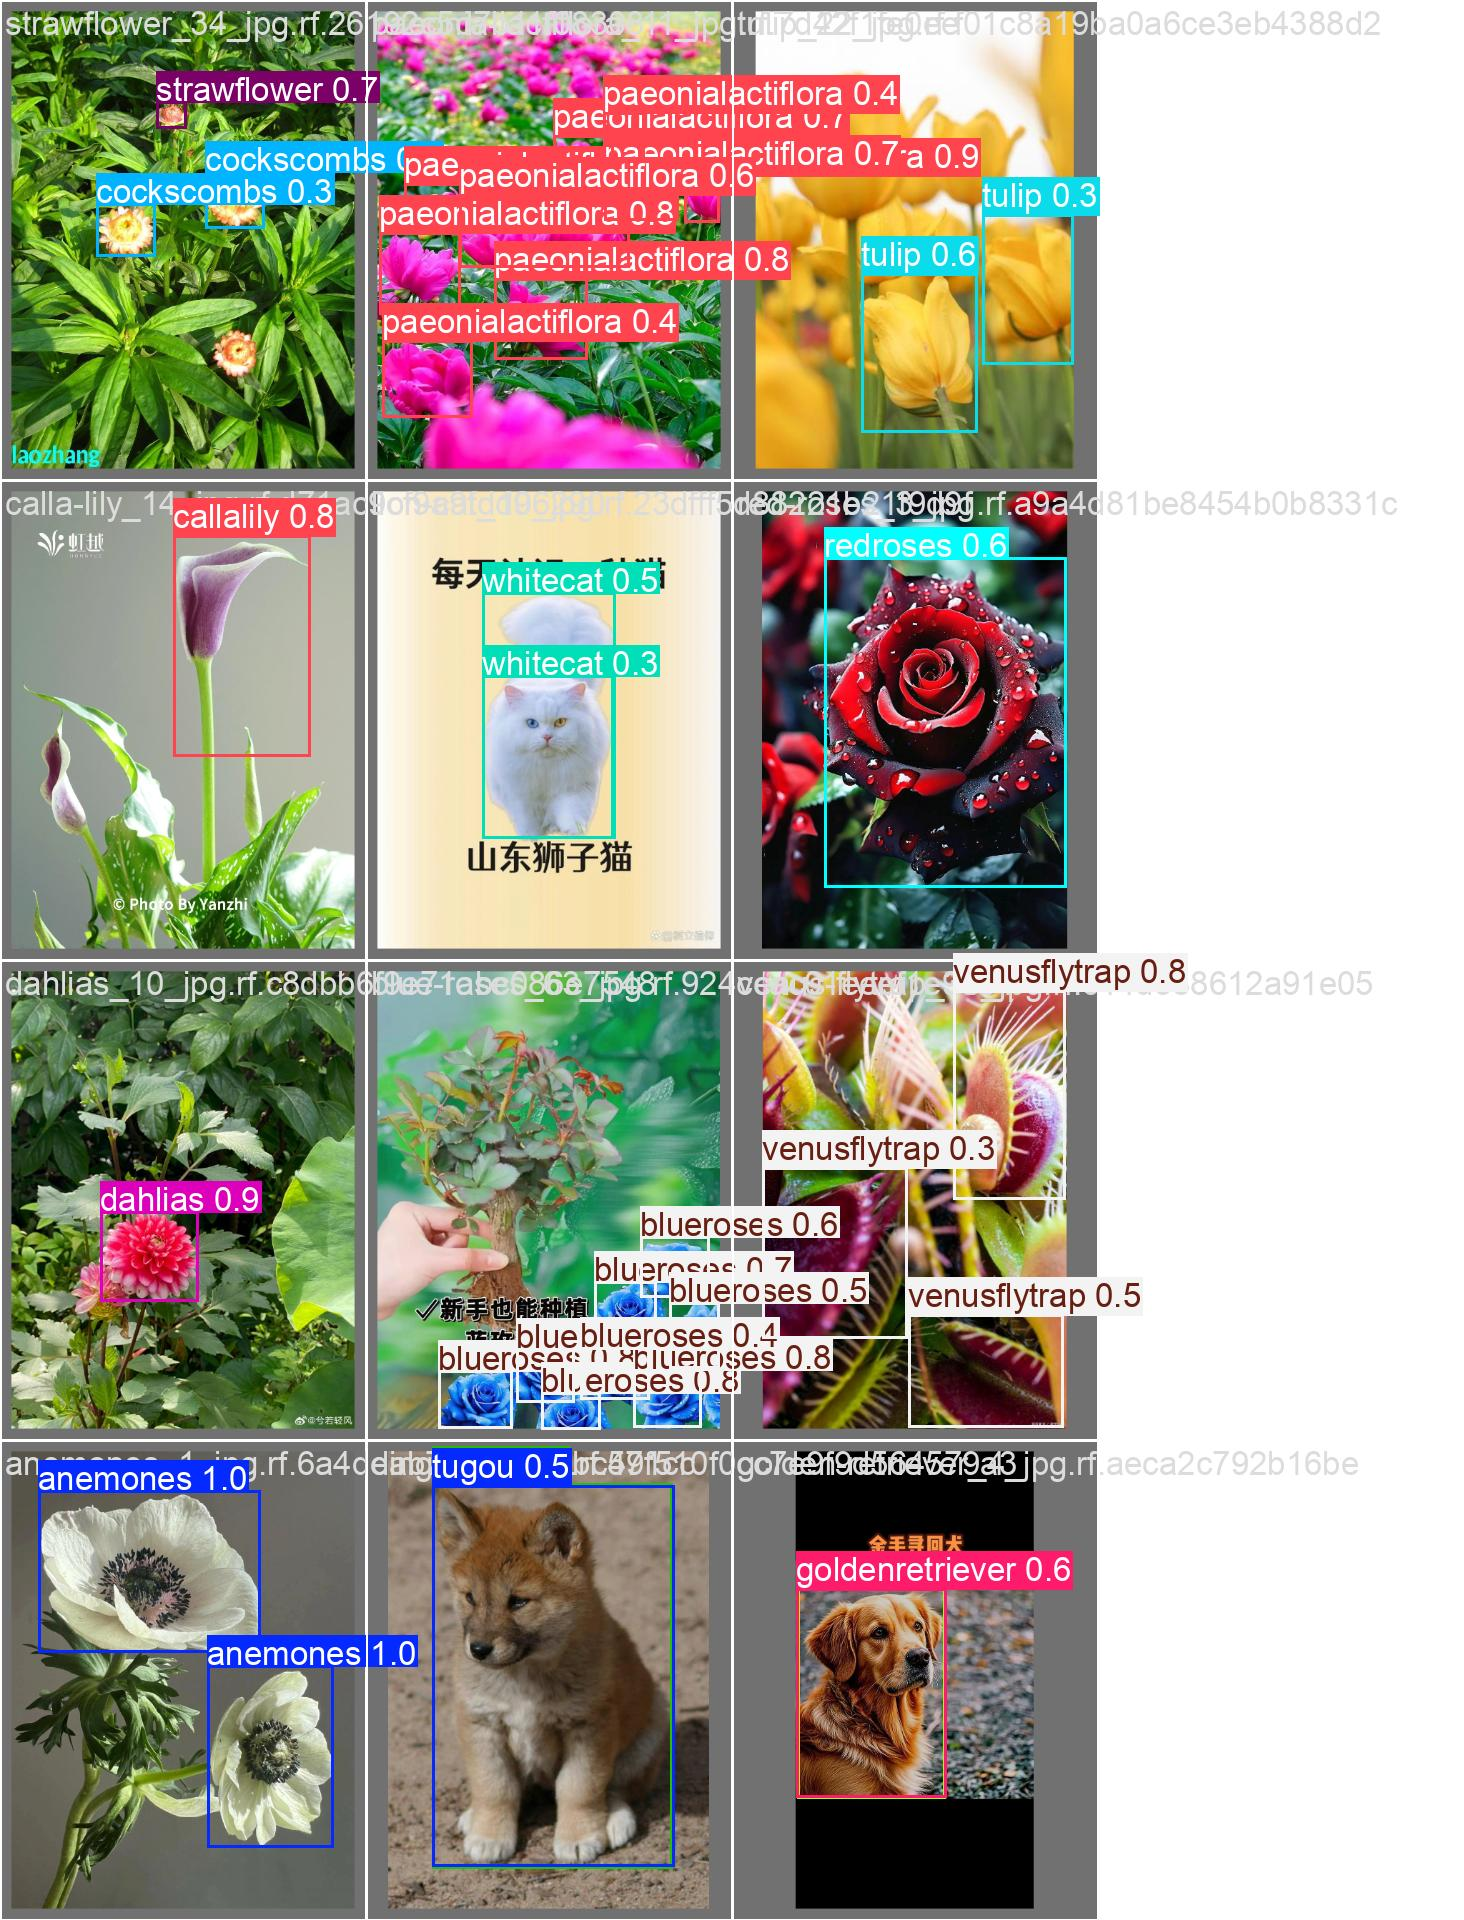

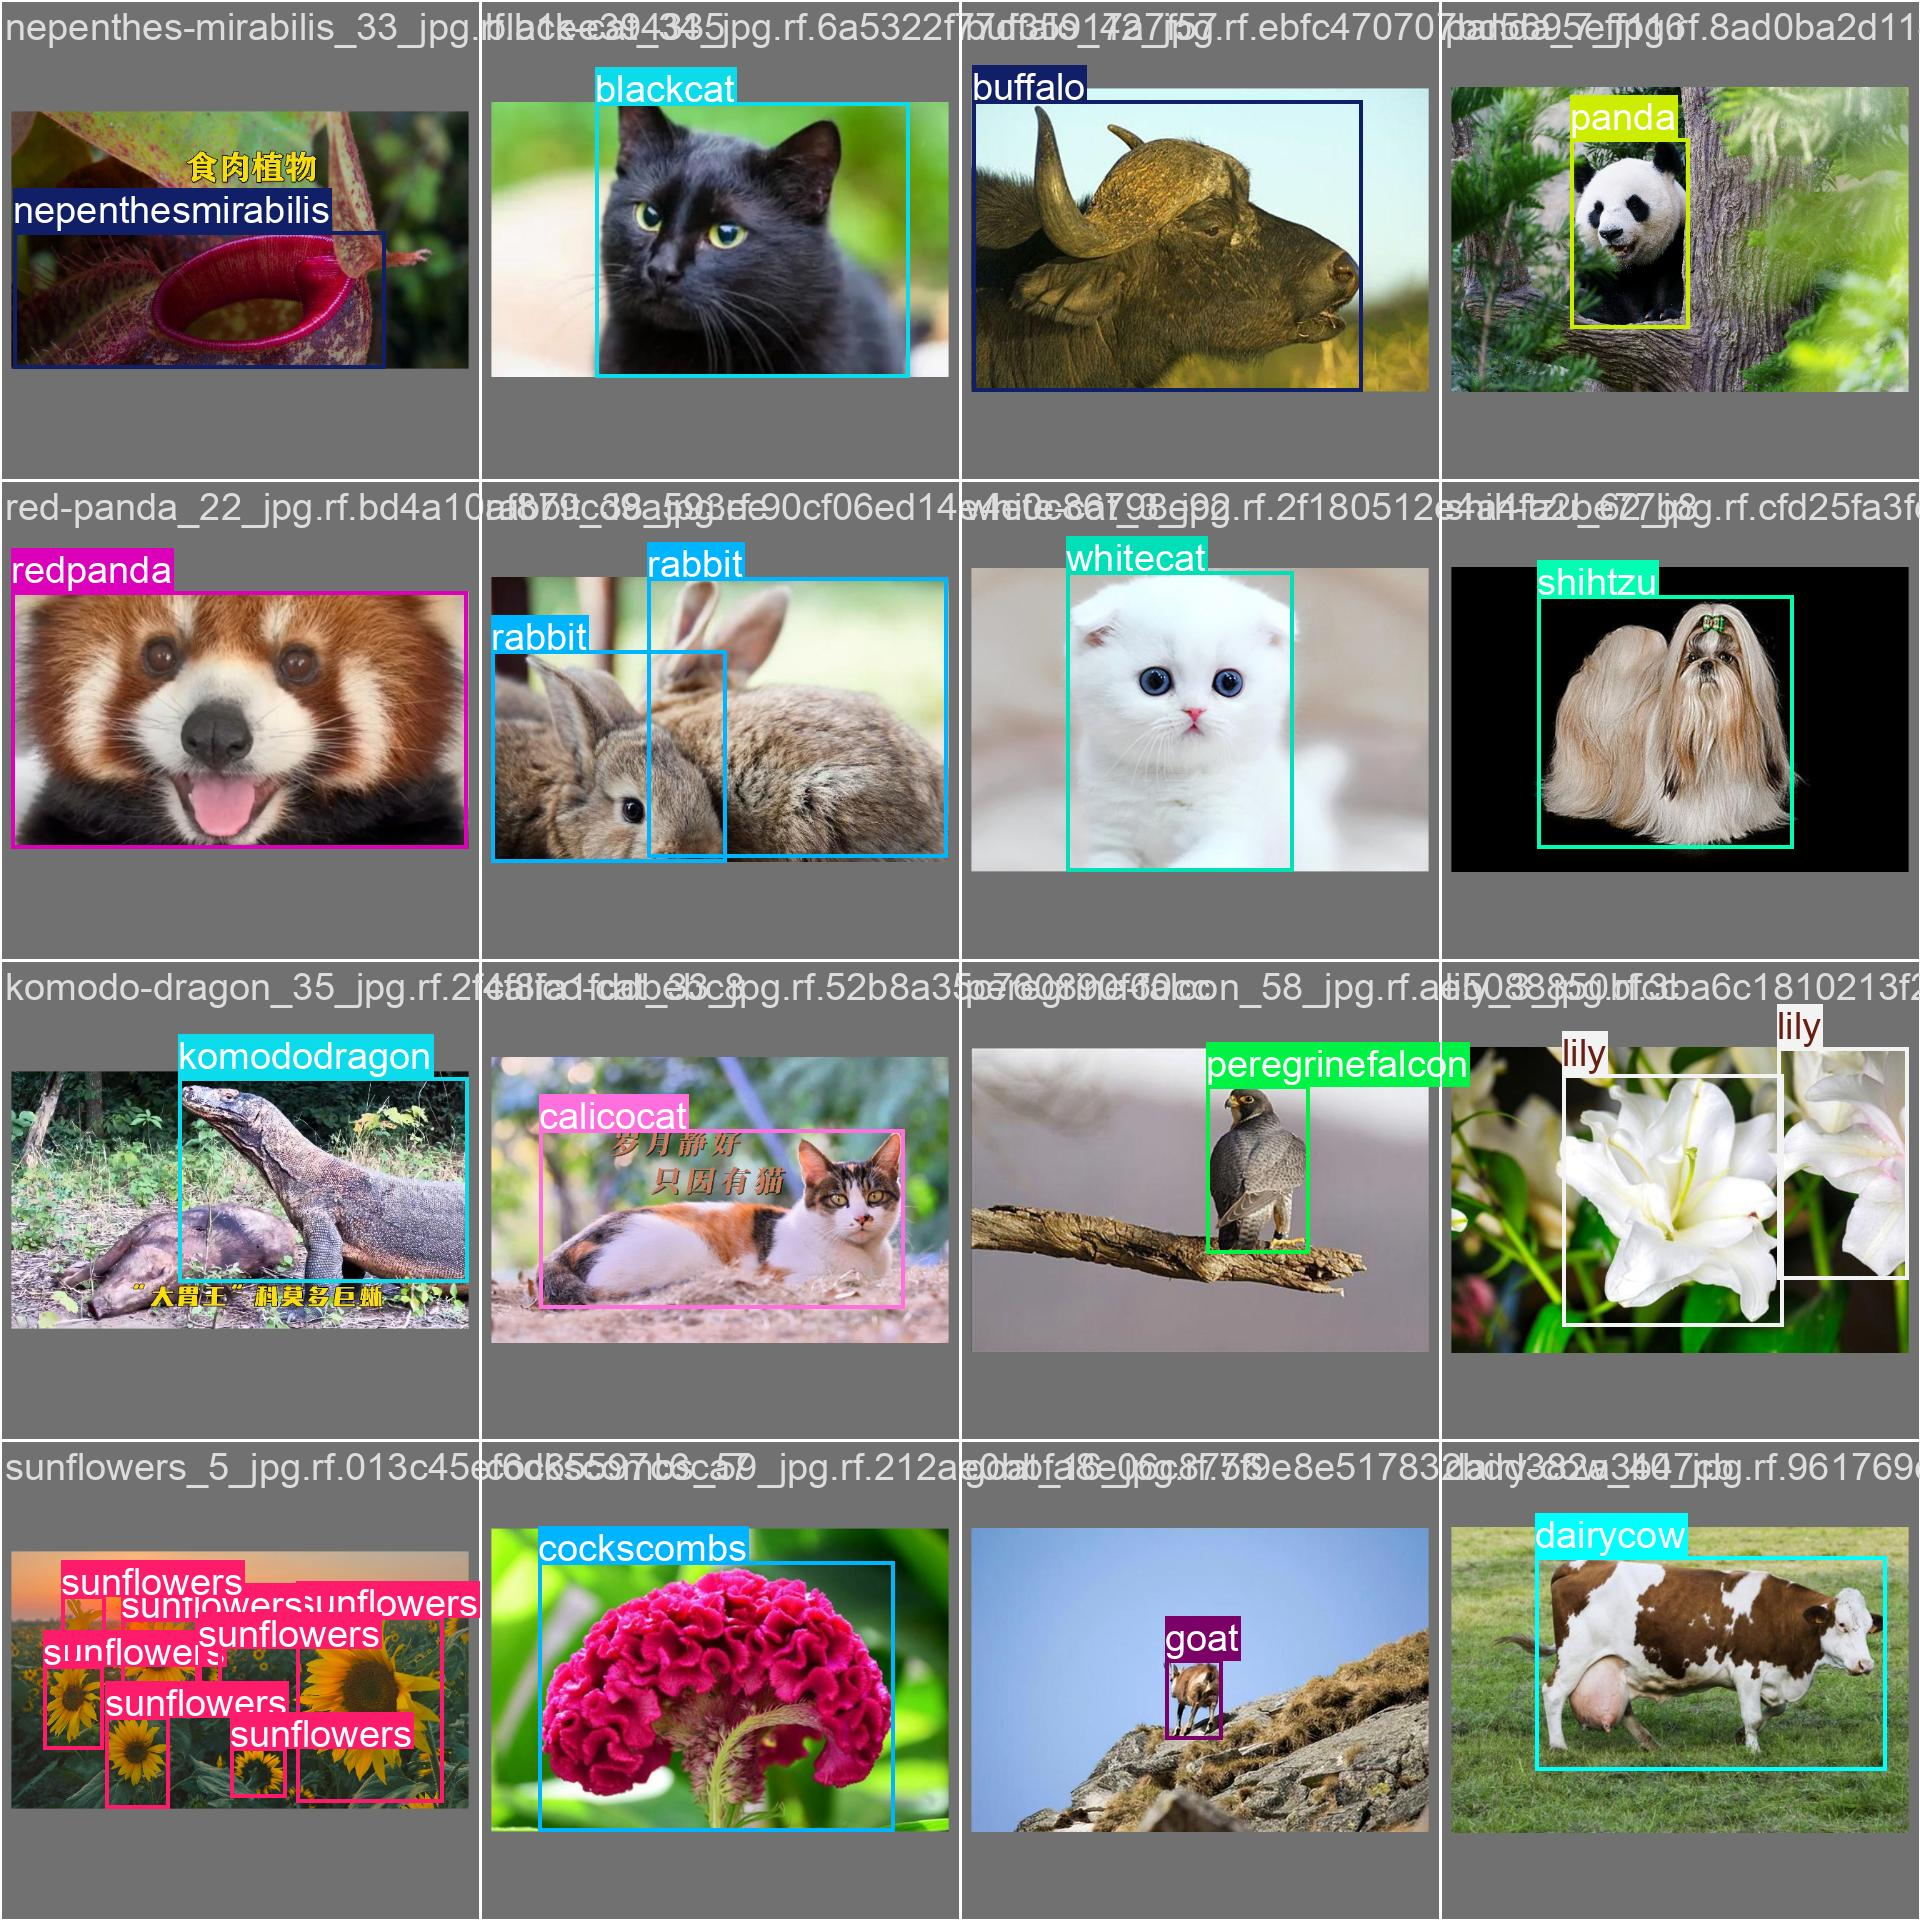

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

# Define the path to the prediction folders
prediction_path = f'{HOME}/runs/detect/train/'

# Get a list of all prediction folders
prediction_folders = glob.glob(prediction_path)

# Check if there are any prediction folders
if prediction_folders:
    # Find the latest folder based on modification time
    latest_folder = max(prediction_folders, key=os.path.getmtime)

    # Display the first four images from the latest folder
    for img in glob.glob(f'{latest_folder}/*.jpg')[:4]:
        display(IPyImage(filename=img, width=600))
        print("\n")
else:
    print(f"No prediction folders found in {prediction_path}")


This can be deployed back to Roboflow for a user friendly interface

In [ ]:
from roboflow import Roboflow


project = rf.workspace("ambreen-5bh9j").project("animal-plant-detection-lr7ta")

# Upload your model weights
model_path =f"{HOME}/runs/detect/train/"
project.version(1).deploy(model_type="yolov11", model_path=f"{HOME}/runs/detect/train/")



loading Roboflow workspace...
loading Roboflow project...
An error occured when getting the model upload URL: This version already has a trained model. Please generate and train a new version in order to upload model to Roboflow.
